In [1]:
from calendar import month
import matplotlib.pyplot as plt
import pandas as pd

# Exercise: Exploratory Data Analysis with Pandas
## Instructions
1. Data Collection
    - Search and collect data on the following: (1993 - 2023)
        - Israel interest tares
        - US interest rates
        - USD to ILS exchange rates
    - For each dataset, create a pandas DataFrame with the following columns:
        - Year
        - Month
        - Current_Rate (Interest rate or exchange rate for that month)
        - Change_From_Last_Month (Difference in Current_Rate from the previous month)
        - Optional: You may include additional columns if you find them useful (e.g., Change_Percentage, Date).



In [2]:
#ייבוא הנתונים
chenge = pd.read_csv('data/USD_ILS Historical Data.csv')
usa_interes = pd.read_csv('data/FEDFUNDS.csv')
israel_interes = pd.read_csv('data/BR.csv')



In [3]:
#שפצור הנתונים, יצירת עמודות נדרשות וסידור מחדש
chenge['Date'] = pd.to_datetime(chenge['Date'])
chenge['year'] = chenge['Date'].dt.year
chenge['month'] = chenge['Date'].dt.month
chenge['Change %'] = chenge['Change %'].str.replace('%', '').astype(float)
chenge.rename(columns={'Change %':'Current_Rate_chenge'}, inplace=True)


In [4]:
chenge.sort_values(['year','month'], inplace=True )
chenge['Change_From_Last_Month_USD_ILS'] = chenge['Current_Rate_chenge'].diff()
chenge = chenge[['year', 'month', 'Current_Rate_chenge', 'Change_From_Last_Month_USD_ILS']]

In [5]:
usa_interes['DATE'] = pd.to_datetime(usa_interes['DATE'])

In [6]:
usa_interes['year'] = usa_interes['DATE'].dt.year
usa_interes['month'] = usa_interes['DATE'].dt.month
usa_interes.rename(columns={'FEDFUNDS':'Current_Rate'}, inplace=True)
usa_interes['Change_From_Last_Month'] = usa_interes['Current_Rate'].diff()
usa_interes.head()

,DATE,Current_Rate,year,month,Change_From_Last_Month
0,1993-01-01,3.02,1993,1,NaN
1,1993-02-01,3.03,1993,2,0.01
2,1993-03-01,3.07,1993,3,0.04
3,1993-04-01,2.96,1993,4,-0.11
4,1993-05-01,3.00,1993,5,0.04


In [7]:
israel_interes['TIME_PERIOD'] = pd.to_datetime(israel_interes['TIME_PERIOD'])
usa_interes.rename(columns={'FEDFUNDS':'Current_Rate'}, inplace=True)

In [8]:

israel_interes['year'] = israel_interes['TIME_PERIOD'].dt.year
israel_interes['month'] = israel_interes['TIME_PERIOD'].dt.month

In [9]:
israel_interes = israel_interes[['TIME_PERIOD','OBS_VALUE','year','month']]

In [10]:
israel_monthly = israel_interes.groupby(['year', 'month'])['OBS_VALUE'].mean().reset_index()
israel_monthly.head()

,year,month,OBS_VALUE
0,1994,1,10.500000
1,1994,2,10.500000
2,1994,3,10.500000
3,1994,4,10.500000
4,1994,5,10.919355


## Part A: Single DataFrame Analysis 
1. Display the first 5 rows of the US interest rates DataFrame.

2. Calculate the average Israeli interest rate over the period covered by your data.

3. Find the month and year when the USD to ILS exchange rate had the highest increase from the previous month.

4. Determine the total number of months where the US interest rate decreased compared to the previous month.

5. Add a new column to the Israeli interest rates DataFrame called Change_Percentage, representing the percentage change from the previous month.



In [11]:
# A - 1
# your code here
usa_interes.head()

,DATE,Current_Rate,year,month,Change_From_Last_Month
0,1993-01-01,3.02,1993,1,NaN
1,1993-02-01,3.03,1993,2,0.01
2,1993-03-01,3.07,1993,3,0.04
3,1993-04-01,2.96,1993,4,-0.11
4,1993-05-01,3.00,1993,5,0.04


In [12]:
# A - 2
# your code here
israel_monthly['OBS_VALUE'].mean()

4.902782735581492

In [14]:
# A - 3
# your code here
chenge['Change_From_Last_Month_USD_ILS'].max()

11.370000000000001

In [16]:
# A - 4
# your code here
usa_interes[usa_interes['Change_From_Last_Month'] < 0]['Change_From_Last_Month'].count()

123

In [18]:
# A - 5
# your code here
israel_monthly['Change_Percentage'] = israel_monthly['OBS_VALUE'].diff()
israel_monthly['Change_Percentage']

0           NaN
1      0.000000
2      0.000000
3      0.000000
4      0.419355
         ...   
344    0.580645
345    0.556452
346    0.310215
347    0.383333
348    0.000000
Name: Change_Percentage, Length: 349, dtype: float64

## Part B: Merging DataFrames
1. Merge the US and Israeli interest rates DataFrames on Year and Month.

2. In the merged DataFrame, create a new column Rate_Difference that shows the difference between the Israeli and US interest rates for each month.

3. Identify all months when the Israeli interest rate was at least 1% higher than the US interest rate - IH (Israeli Higher).
Identify all months when the US interest rate was at least 1% higher than the Israeli interest rate - UH (US Higher).
Identify all months when the interest rates were within 1% of each other - N (Near)
make a new column called Rate_Comparison with the following values: IH, UH, or N.

4. Merge the exchange rate DataFrame with the merged interest rates DataFrame.

5. After merging all three DataFrames, find the correlation between the Rate_Difference and the Current_Rate of the exchange rate.
hint: find the connection between the difference in interest rates and the exchange rates, use any method you think is appropriate.
provide an explanation of the results (in Hebrew) - at least 2 rows of text + a proof of the connection(some output) you found.


In [19]:
# B - 1
# your code here
marge_df = pd.merge(usa_interes,israel_monthly, on = ['year','month'], how = 'left')

In [21]:
marge_df.head(10)

,DATE,Current_Rate,year,month,Change_From_Last_Month,OBS_VALUE,Change_Percentage
0,1993-01-01,3.02,1993,1,NaN,NaN,NaN
1,1993-02-01,3.03,1993,2,0.01,NaN,NaN
2,1993-03-01,3.07,1993,3,0.04,NaN,NaN
3,1993-04-01,2.96,1993,4,-0.11,NaN,NaN
4,1993-05-01,3.00,1993,5,0.04,NaN,NaN
5,1993-06-01,3.04,1993,6,0.04,NaN,NaN
6,1993-07-01,3.06,1993,7,0.02,NaN,NaN
7,1993-08-01,3.03,1993,8,-0.03,NaN,NaN
8,1993-09-01,3.09,1993,9,0.06,NaN,NaN
9,1993-10-01,2.99,1993,10,-0.10,NaN,NaN


In [22]:
# B - 2
# your code here
marge_df['Rate_Differenc'] = marge_df['Current_Rate'] - marge_df['OBS_VALUE']

In [23]:
# B - 4
# your code here
total_marge = pd.merge(chenge, marge_df, on = ['year','month'], how = 'left')
total_marge = total_marge[12:361]
total_marge.head(10)

,year,month,Current_Rate_chenge,Change_From_Last_Month_USD_ILS,DATE,Current_Rate,Change_From_Last_Month,OBS_VALUE,Change_Percentage,Rate_Differenc
12,1994,1,0.17,-0.07,1994-01-01,3.05,0.09,10.500000,NaN,-7.450000
13,1994,2,-0.37,-0.54,1994-02-01,3.25,0.20,10.500000,0.000000,-7.250000
14,1994,3,-0.33,0.04,1994-03-01,3.34,0.09,10.500000,0.000000,-7.160000
15,1994,4,1.18,1.51,1994-04-01,3.56,0.22,10.500000,0.000000,-6.940000
16,1994,5,1.17,-0.01,1994-05-01,4.01,0.45,10.919355,0.419355,-6.909355
17,1994,6,-0.31,-1.48,1994-06-01,4.25,0.24,11.516667,0.597312,-7.266667
18,1994,7,1.17,1.48,1994-07-01,4.26,0.01,12.064516,0.547849,-7.804516
19,1994,8,-1.05,-2.22,1994-08-01,4.47,0.21,12.500000,0.435484,-8.030000
20,1994,9,-0.41,0.64,1994-09-01,4.73,0.26,14.100000,1.600000,-9.370000
21,1994,10,-0.32,0.09,1994-10-01,4.76,0.03,15.500000,1.400000,-10.740000


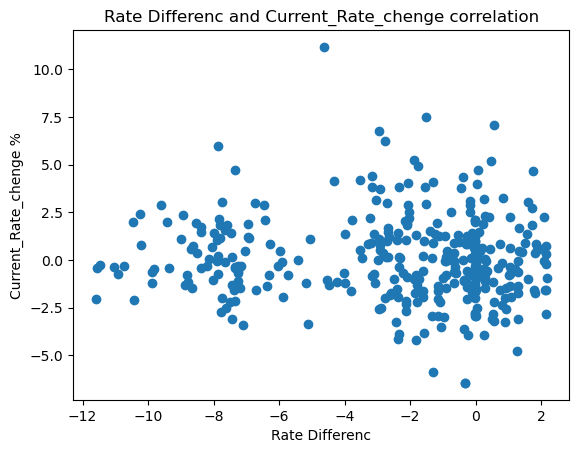

In [24]:
# B - 5
# your code here
plt.figure()
plt.scatter(total_marge['Rate_Differenc'],total_marge['Current_Rate_chenge'])
plt.xlabel('Rate Differenc')
plt.ylabel('Current_Rate_chenge %')
plt.title('Rate Differenc and Current_Rate_chenge correlation')
plt.show()

מהגרף ניתן לראות כי יחס ההמרה שומר על מגמה יציבה ולא מושפע מיחס הריבית

## Part C: Analyzing Relationships Between DataFrames
1. Analyze whether increases in US interest rates are associated with increases or decreases in the USD to ILS exchange rate in the same month.

2. Determine if changes in the Israeli interest rate have a stronger impact on the exchange rate than changes in the US interest rate.

3. Find any time lags in the effect of interest rate changes on the exchange rate. For example, does a change in US interest rates affect the exchange rate in the following month?
(כלומר- האם כשיש שינוי בריבית כלשהי - האם מייד יש שינוי בשער ההמרה? או שיש דיליי של חודש/חודשים עד שמרגישים את ההשפעה - אם בכלל?)

4. Calculate the rolling past 3-month average of the exchange rate for each data time, and add it as a new column.

5. Identify any periods where both US and Israeli interest rates were decreasing, and analyze how the exchange rate behaved during those periods.



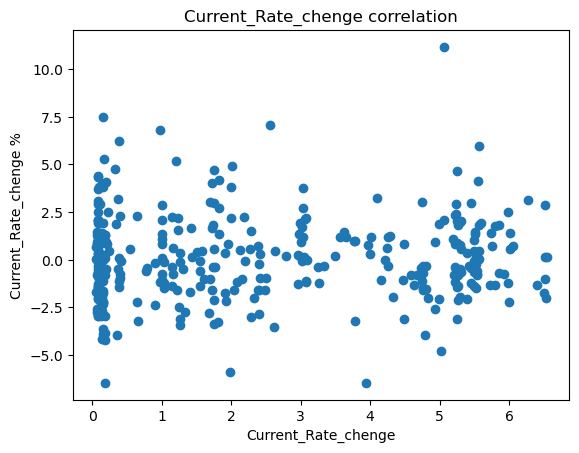

In [25]:
# Bonus 
plt.figure()
plt.scatter(usa_interes.Current_Rate[:361], chenge['Current_Rate_chenge'][:361])
plt.xlabel('Current_Rate_chenge')
plt.ylabel('Current_Rate_chenge %')
plt.title('Current_Rate_chenge correlation')
plt.show()

# Bonus
choose 3 global / local events or periods that you think could have affected the exchange rate or interest rates
and analyze the effect of these events on the data you collected.
show proof of your analysis that supports your claim.

(כלומר- תבחנו אירועים שקרו בתקופה שאתם עובדים עליה ובדקו איך הם השפיעו על הנתונים שאתם עובדים איתם)
למשל: בחירות בארה״ב, בחירות בישראל, רוסיה אוקראינה, מלחמות בישראל וכו׳.

In [ ]:
# Your code here